In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv', index_col=[0])

In [3]:
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


In [4]:
df.tail()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0
862,15,27,1,70.0,0,0,14,31,19,12,3,1,0,0


In [5]:
df.shape

(863, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.1 KB


In [7]:
one = OneHotEncoder(sparse=False)

In [8]:
loc=pd.DataFrame(one.fit_transform(df[['location']]))
con=pd.DataFrame(one.fit_transform(df[['country']]))
gen=pd.DataFrame(one.fit_transform(df[['gender']]))
s1=pd.DataFrame(one.fit_transform(df[['symptom1']]))
s2=pd.DataFrame(one.fit_transform(df[['symptom2']]))
s3=pd.DataFrame(one.fit_transform(df[['symptom3']]))
s4=pd.DataFrame(one.fit_transform(df[['symptom4']]))
s5=pd.DataFrame(one.fit_transform(df[['symptom5']]))
new_df = pd.concat ([loc,con,gen,s1,s2,s3,s4,s5], axis=1)
new_df

,0,1,2,3,4,5,6,7,8,9,...,7,8,9,10,11,12,0,1,2,3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
860,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [9]:
new_df= pd.concat((new_df,df['age'],df['vis_wuhan'],df['from_wuhan'],df['symptom6'],df['diff_sym_hos'],df['result']),axis=1)
new_df

,0,1,2,3,4,5,6,7,8,9,...,0,1,2,3,age,vis_wuhan,from_wuhan,symptom6,diff_sym_hos,result
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,66.0,1,0,1,8,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,56.0,0,1,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,46.0,0,1,1,13,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,60.0,1,0,1,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,58.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,24.0,0,0,1,0,1
859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,35.0,0,0,1,0,0
860,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,49.4,0,0,1,0,0
861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,49.4,0,0,1,0,0


In [10]:
new_df= new_df.drop(columns=['symptom6'], axis=1)
new_df

,0,1,2,3,4,5,6,7,8,9,...,12,0,1,2,3,age,vis_wuhan,from_wuhan,diff_sym_hos,result
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,66.0,1,0,8,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,56.0,0,1,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,46.0,0,1,13,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,60.0,1,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,58.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,24.0,0,0,0,1
859,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,35.0,0,0,0,0
860,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,49.4,0,0,0,0
861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,49.4,0,0,0,0


In [11]:
new_df.isnull().sum()

0               0
1               0
2               0
3               0
4               0
               ..
age             0
vis_wuhan       0
from_wuhan      0
diff_sym_hos    0
result          0
Length: 275, dtype: int64

In [12]:
x = new_df.drop(columns=['result'])
y = new_df['result']

In [13]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
options = [
{'var_smoothing': np.logspace(-20,0,100),
 'priors':[[0.86956522, 0.13043478],[0.7,0.3],[0.8,0.2],[0.4,0.6],[0.6,0.4]]
}
]
model=GaussianNB()
clf = GridSearchCV(model, param_grid = options, cv = 5, verbose=True, n_jobs=-1)
best_clf = clf.fit(X_train,y_train)
best_clf.best_estimator_





Fitting 5 folds for each of 500 candidates, totalling 2500 fits


GaussianNB(priors=[0.7, 0.3], var_smoothing=0.09770099572992247)

In [15]:
gnb = GaussianNB(priors=[0.7, 0.3], var_smoothing=0.09770099572992247)

scores = cross_val_score(gnb, X_train, y_train , cv = 5, scoring= 'accuracy')
y_train_predict = cross_val_predict(gnb, X_train, y_train , cv = 5)
precision=precision_score(y_train ,y_train_predict)
recall=recall_score(y_train ,y_train_predict)
f1=f1_score(y_train ,y_train_predict)
auc=roc_auc_score(y_train,y_train_predict)
print("accuarcy",scores.mean())
print("precision",precision)
print("recall",recall)
print("f1:",f1)
print("auc:",auc)

gnb.fit(X_train, y_train)

accuarcy 0.9405797101449276
precision 0.7349397590361446
recall 0.7625
f1: 0.7484662576687117
auc: 0.8632172131147541


GaussianNB(priors=[0.7, 0.3], var_smoothing=0.09770099572992247)

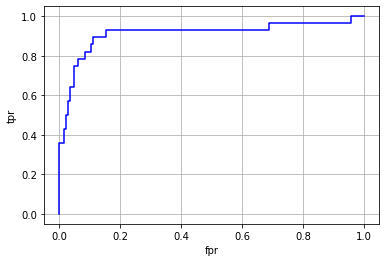

In [16]:
y_pred = gnb.predict(X_test)
y_test_score=gnb.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_test_score[:,1])
plt.plot(fpr,tpr, "b")
plt.grid()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()



In [17]:

print("auc",roc_auc_score(y_test,y_test_score[:,1]))
print("f1",f1_score(y_test,y_pred))
print("recall",recall_score(y_test,y_pred))
print("accuarcy",accuracy_score(y_test,y_pred))
print("precision",precision_score(y_test,y_pred))


auc 0.9108374384236453
f1 0.7037037037037038
recall 0.6785714285714286
accuarcy 0.9075144508670521
precision 0.7307692307692307


In [18]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[138   7]
 [  9  19]]

True Positives(TP) =  138

True Negatives(TN) =  19

False Positives(FP) =  7

False Negatives(FN) =  9


<AxesSubplot:>

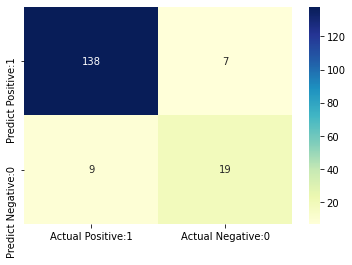

In [19]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       145
           1       0.73      0.68      0.70        28

    accuracy                           0.91       173
   macro avg       0.83      0.82      0.82       173
weighted avg       0.91      0.91      0.91       173



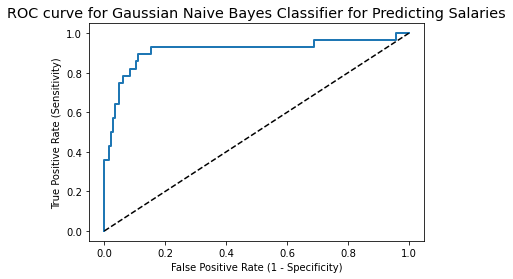

In [21]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_test_score[:,1])

plt.figure(figsize=(6,4))

plt.plot(false_positive_rate, true_positive_rate, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()